# Business Understanding
In today's competitive banking sector, the effectiveness of marketing campaigns is paramount for the success and growth of banking institutions. The ability to accurately predict customer response to term deposit offers can significantly enhance the efficiency and profitability of marketing strategies. The primary goal of this analysis is to explore and model customer data to predict which individuals are more likely to subscribe to a term deposit. This involves understanding the dynamics between various customer attributes and their decision-making processes regarding term deposit subscriptions.

The dataset for this analysis comprises records from direct marketing campaigns (phone calls) of a Portuguese banking institution. These campaigns aimed to promote subscriptions to term deposits among the bank's clients. Each record in the dataset includes client information such as age, job, marital status, education, default status, housing and personal loan status, contact information, and more, along with the campaign outcome (whether the client subscribed to a term deposit).

Objectives
1. Data Loading
2. Data Understanding: Look at the a) Scope, b) Data Types and Classes, c) Data Quality, and d) Exploratory Data Analysis (EDA): To conduct a comprehensive EDA to uncover trends, patterns, and correlations within the dataset. This will involve examining the distribution of key variables, understanding the demographic and financial characteristics of the clients, and identifying significant predictors of term deposit subscriptions.
3. Data Preparation: To clean and preprocess the dataset to facilitate accurate modeling. This includes handling missing values, encoding categorical variables, normalizing numerical data, and potentially creating new features that could enhance model performance.
4. Predictive Modeling: To develop and train predictive models that can accurately forecast client responses to term deposit campaigns. Various algorithms will be explored to find the most effective approach, considering accuracy, interpretability, and operational feasibility.
5. Feature Importance Analysis: To interpret the model outcomes, focusing on understanding which client attributes significantly influence their likelihood of subscribing to a term deposit. This insight will direct marketing strategies toward the most promising prospects.
6. Deployment and Strategy Implementation: To leverage the insights and predictive models developed through this analysis to refine and optimize future marketing campaigns. The objective is to enhance targeting precision, improve conversion rates, and ultimately increase the profitability of term deposit marketing efforts.

Expected Outcomes
1. A detailed report highlighting key findings from the EDA, including client demographics and behavior patterns related to term deposit subscriptions.
2. A robust predictive model or set of models capable of forecasting client responses to term deposit offers.
3. Recommendations for targeting criteria and strategies for future marketing campaigns based on model insights and feature importance analysis.

# 1. Data Loading

In [17]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

from sklearn.model_selection import train_test_split
from imblearn.over_sampling  import SMOTE
from imblearn.combine        import SMOTETomek
from imblearn.pipeline       import Pipeline as ImbPipeline

from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.svm             import SVC
from sklearn.metrics         import classification_report, accuracy_score

from sklearn.pipeline        import Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.preprocessing   import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute          import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import confusion_matrix

# Load the dataset
file_path = 'data/bank-full.csv'
df = pd.read_csv(file_path, sep=';')

# 2. Data Understanding
This part involves exploring the dataset to understand its structure, quality, and the types of information it contains. It's implemented with four steps:

1. Understanding Data Scope
2. Understanding data types.
3. Understanding data quality.
4. Completing Exploratory Data Anlysis.

## 2.1: Data Scope
Obtain a general sense of the size and content of the dataset. Determine the column that will serve as the target variable, and which columns will serve as inputs to the analysis.

In [2]:
# Display the first few rows of the dataset to understand its structure
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20625,48,management,married,secondary,no,286,no,no,cellular,12,aug,127,1,-1,0,unknown,no
4815,36,technician,single,secondary,no,1053,yes,no,unknown,21,may,147,1,-1,0,unknown,no
9417,35,housemaid,married,primary,no,8127,no,no,unknown,6,jun,315,1,-1,0,unknown,no
32861,32,blue-collar,married,primary,no,2114,yes,no,telephone,17,apr,40,1,-1,0,unknown,no
2646,41,management,married,primary,no,-4,yes,yes,unknown,13,may,181,3,-1,0,unknown,no
12606,42,management,single,tertiary,no,1156,yes,no,unknown,4,jul,62,1,-1,0,unknown,no
17185,55,entrepreneur,married,secondary,no,814,no,yes,cellular,28,jul,69,12,-1,0,unknown,no
36513,30,management,married,secondary,no,0,yes,no,cellular,12,may,756,3,-1,0,unknown,no
31656,36,self-employed,married,secondary,no,1184,yes,no,cellular,6,apr,1063,1,-1,0,unknown,yes
31490,49,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## 2.2: Data Types and Classes
Obtain the data type of each column. Determine which columns are numerical and which are categorical. Dtermine the acceptable ranges for numerical values. Determine the number of unique values in each categorical column as well as the acceptable values for each column. Identify derived columns and/or data transformations that might be useful for the analysis.

In [5]:
################################################################################################################################
#Determine the unique values for each column
################################################################################################################################
for col in df.columns:
    print(f"# of Unique values in '{col}':", df[col].nunique())
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()
    
#--------------------------------------------------------------------------------------------------------------------------------
# OBSERVATIONS AFTER RUNNING
#--------------------------------------------------------------------------------------------------------------------------------
#Can implement single column incoding for 'default', 'housing', 'loan', and '' columns

# of Unique values in 'age': 77
Unique values in 'age':
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

# of Unique values in 'job': 12
Unique values in 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

# of Unique values in 'marital': 3
Unique values in 'marital':
['married' 'single' 'divorced']

# of Unique values in 'education': 4
Unique values in 'education':
['tertiary' 'secondary' 'unknown' 'primary']

# of Unique values in 'default': 2
Unique values in 'default':
['no' 'yes']

# of Unique values in 'balance': 7168
Unique values in 'balance':
[ 2143    29     2 ...  8205 14204 16353]

# of Unique values in 'housing': 2
Unique values in 'housing':
['yes' 'no']

# of Unique values in 'loan'

## 2.3: Data Quality
Assess the data quality. Determine if there are any duplicate entries, missing values, and inconsistencies between columns. Develop strategies for dealing with them. For example, misclassifications in one column can often be determined and corrected based on information in another column.

In [6]:
################################################################################################################################
# Check the numeric columns for specific values or ranges of values
################################################################################################################################
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Initialize a DataFrame to hold the counts
count_table = pd.DataFrame(index=num_cols.columns, columns=['== -1','<  0', '==  0', '>  0', '==  1', 'NaN', 'Min', 'Max'])

# Populate the table with counts
for column in num_cols.columns:
    count_table.loc[column, '== -1'] = (num_cols[column] == -1).sum()
    count_table.loc[column,  '<  0'] = (num_cols[column] <   0).sum()
    count_table.loc[column, '==  0'] = (num_cols[column] ==  0).sum()
    count_table.loc[column,  '>  0'] = (num_cols[column] >   0).sum()
    count_table.loc[column, '==  1'] = (num_cols[column] ==  1).sum()
    count_table.loc[column,   'NaN'] =  num_cols[column].isna().sum()
    count_table.loc[column,   'Min'] =  num_cols[column].min()
    count_table.loc[column,   'Max'] =  num_cols[column].max()

count_table

#--------------------------------------------------------------------------------------------------------------------------------
# OBSERVATIONS AFTER RUNNING
#--------------------------------------------------------------------------------------------------------------------------------
# 1. There are no missing values.
# 2. The vast majority of 'previous' are coded as 0 indicating customners who have never been contacted. Whenever 'previous' is 0,
#    'pdays' is set to -1. This suggests it is beneficial to implement separate analyses for customers who have been previously
#    vs. customers who have never been previously conteacted. This analysis will make use of the full dataset and focus on
#    customers who have been previously contacted.

,== -1,< 0,== 0,> 0,== 1,NaN,Min,Max
age,0,0,0,45211,0,0,18,95
balance,50,3766,3514,37931,195,0,-8019,102127
day,0,0,0,45211,322,0,1,31
duration,0,0,3,45208,2,0,0,4918
campaign,0,0,0,45211,17544,0,1,63
pdays,36954,36954,0,8257,15,0,-1,871
previous,0,0,36954,8257,2772,0,0,275


In [7]:
################################################################################################################################
# Check for the percentage of missing values designated as 'NaN'
################################################################################################################################
object_columns_df = df.select_dtypes(include=['object'])
nan_percent = object_columns_df.isnull().sum() / object_columns_df.shape[0] * 100
print(nan_percent)

#--------------------------------------------------------------------------------------------------------------------------------
# OBSERVATIONS AFTER RUNNING
#--------------------------------------------------------------------------------------------------------------------------------
#None -- No Missing Values.

job          0.0
marital      0.0
education    0.0
default      0.0
housing      0.0
loan         0.0
contact      0.0
month        0.0
poutcome     0.0
y            0.0
dtype: float64


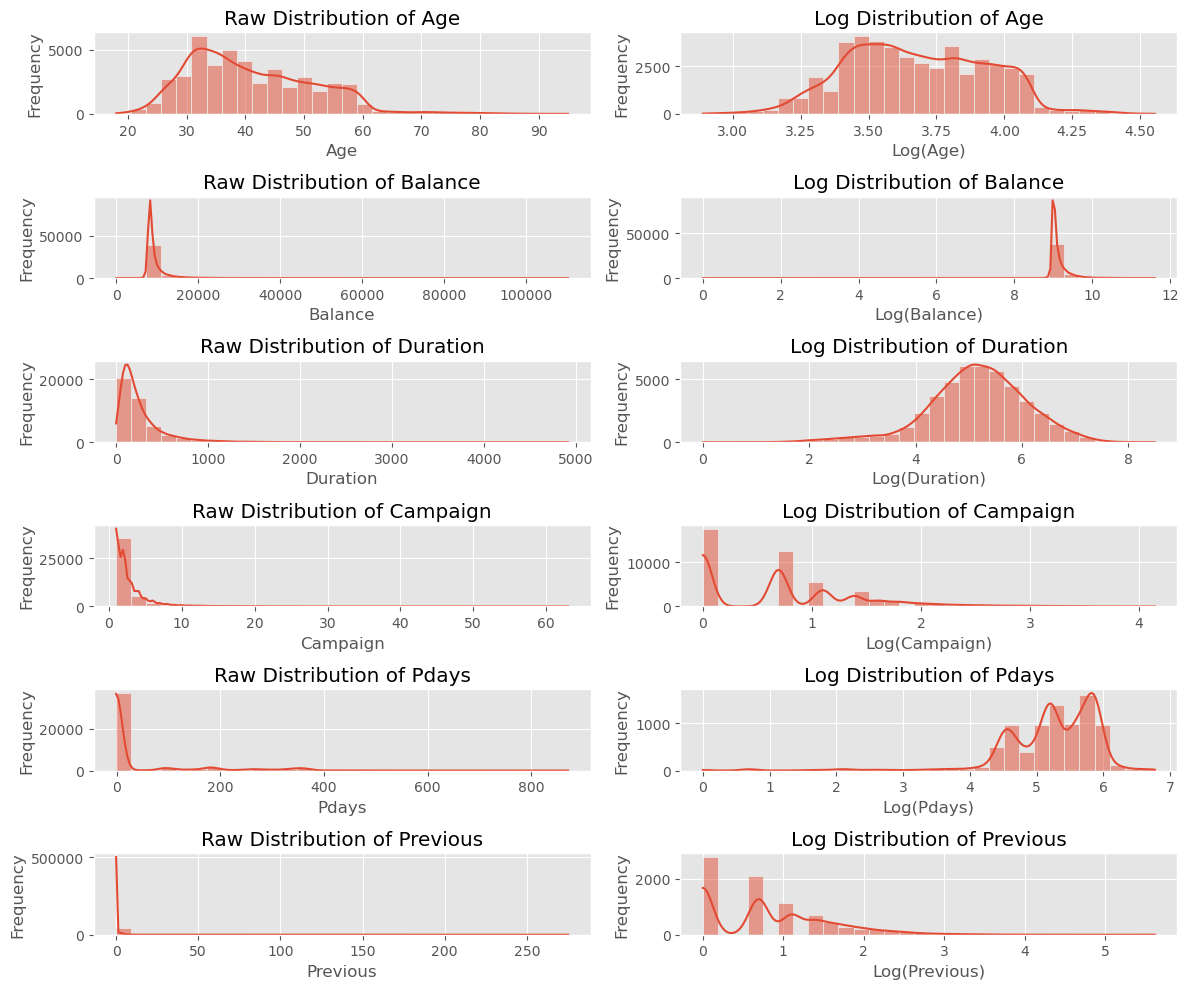

In [20]:
################################################################################################################################
# Check histograms of all numeric variables
################################################################################################################################

warnings.filterwarnings('ignore')

# list of numerical features
features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Adjust 'balance' so that its minimum value is 1 to prevent issues with log(balance) calculation
df['balance_adj'] = df['balance'] - df['balance'].min() + 1

# Adjust 'pdays' temporarily for log transformation where -1 indicates not previously contacted
df['pdays_for_log'] = df['pdays'].replace(-1, np.nan)  # Replace -1 with NaN

# Setting up the subplot environment
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(12, 10))

# Loop through the features for side-by-side plots
for i, feature in enumerate(features):
    # Use adjusted 'balance' for the plots
    column_to_plot  = 'balance_adj' if feature == 'balance' else feature
    feature_for_log = 'pdays_for_log' if feature == 'pdays' else column_to_plot

    # Raw data plot on the left
    sns.histplot(df[feature if feature != 'balance' else 'balance_adj'], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Raw Distribution of {feature.capitalize()}')
    axes[i, 0].set_xlabel(feature.capitalize())
    axes[i, 0].set_ylabel('Frequency')
    
    # Log transformation and plot on the right, excluding NaN values for 'pdays'
    valid_indices = df[feature_for_log] > 0  # Ensure positive values for log
    sns.histplot(np.log(df.loc[valid_indices, feature_for_log]), bins=30, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Log Distribution of {feature.capitalize()}')
    axes[i, 1].set_xlabel(f'Log({feature.capitalize()})')
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Cleanup: remove temporary columns
df.drop(['balance_adj', 'pdays_for_log'], axis=1, inplace=True)

#--------------------------------------------------------------------------------------------------------------------------------
# OBSERVATIONS AFTER RUNNING
#--------------------------------------------------------------------------------------------------------------------------------
# 1. 'age', 'balance','duration', 'pdays', and 'previous' all have skewed histograms. Subsequent analysis may benefit from using
#     log values for these independent variables
# 2. 'campaign' is essentially an ordinal encoded value, and is acceptable as is.

In [9]:
################################################################################################################################
# Target Class Counts
################################################################################################################################
print("Balance of Target Variable:")
print(df['y'].value_counts())

#--------------------------------------------------------------------------------------------------------------------------------
# OBSERVATIONS AFTER RUNNING
#--------------------------------------------------------------------------------------------------------------------------------
# Target variable has only two classes: 'yes' and 'no'
# The target variable is heavily imbalanced with approximately 8 times the number of 'yes' over 'no' responses

Balance of Target Variable:
y
no     39922
yes     5289
Name: count, dtype: int64


## 2.4: Exploratory Data Analysis (EDA)
Use bar plots, to get a sense of the relationships between the columns. Develop strategies. Identify opportunities for model simplification, particularly with respect to the numerical columns, which may have interdependencies as identified by principal componenents analysis.

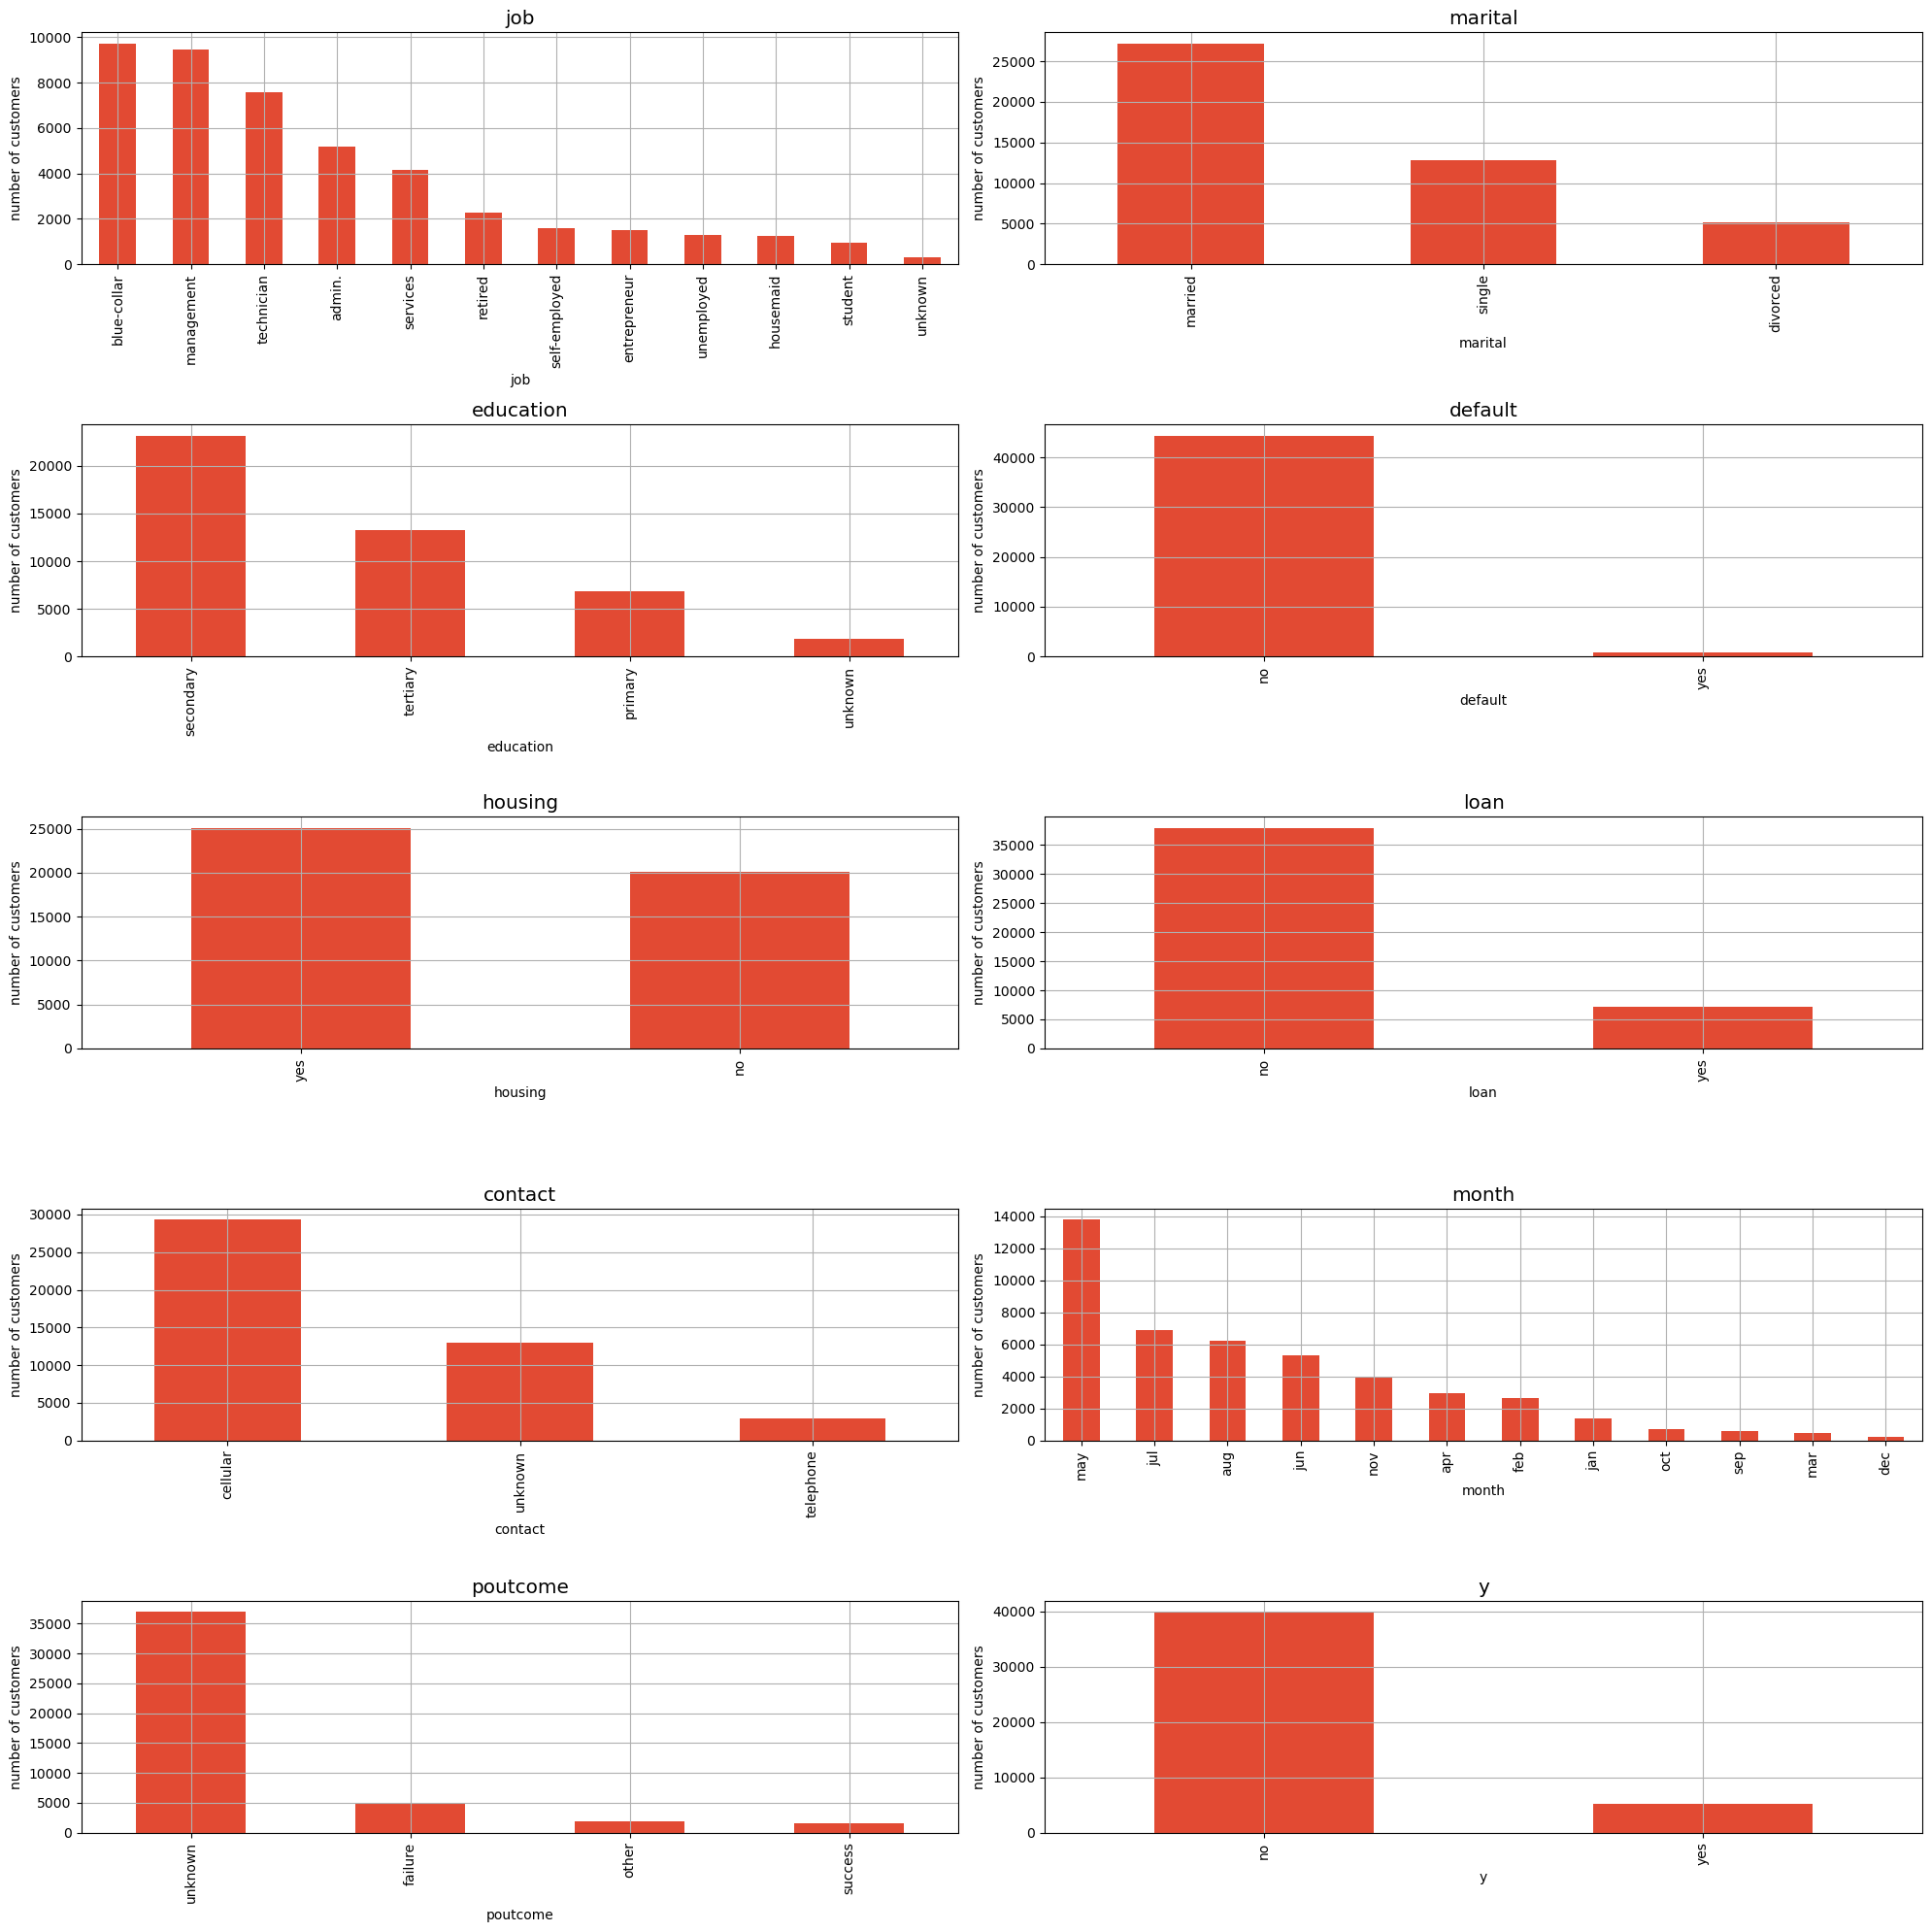

In [10]:
cat_var = df.select_dtypes(include=["object"]).columns

# Setting up the matplotlib figure and axes for a 5x2 subplot
fig, axs = plt.subplots(5, 2, figsize=(20, 20))  # Adjust the figure size as necessary
plt.style.use("ggplot")

# Flattening the axes array for easy iteration
axs = axs.flatten()

for i, column in enumerate(cat_var):
    if i < 10:  # Ensuring we only plot for the first 10 categorical variables
        df[column].value_counts().plot(kind="bar", ax=axs[i])
        axs[i].set_xlabel(column)
        axs[i].set_ylabel("number of customers")
        axs[i].set_title(column)
    else:
        break  # Exit the loop if there are more than 10 categorical variables

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

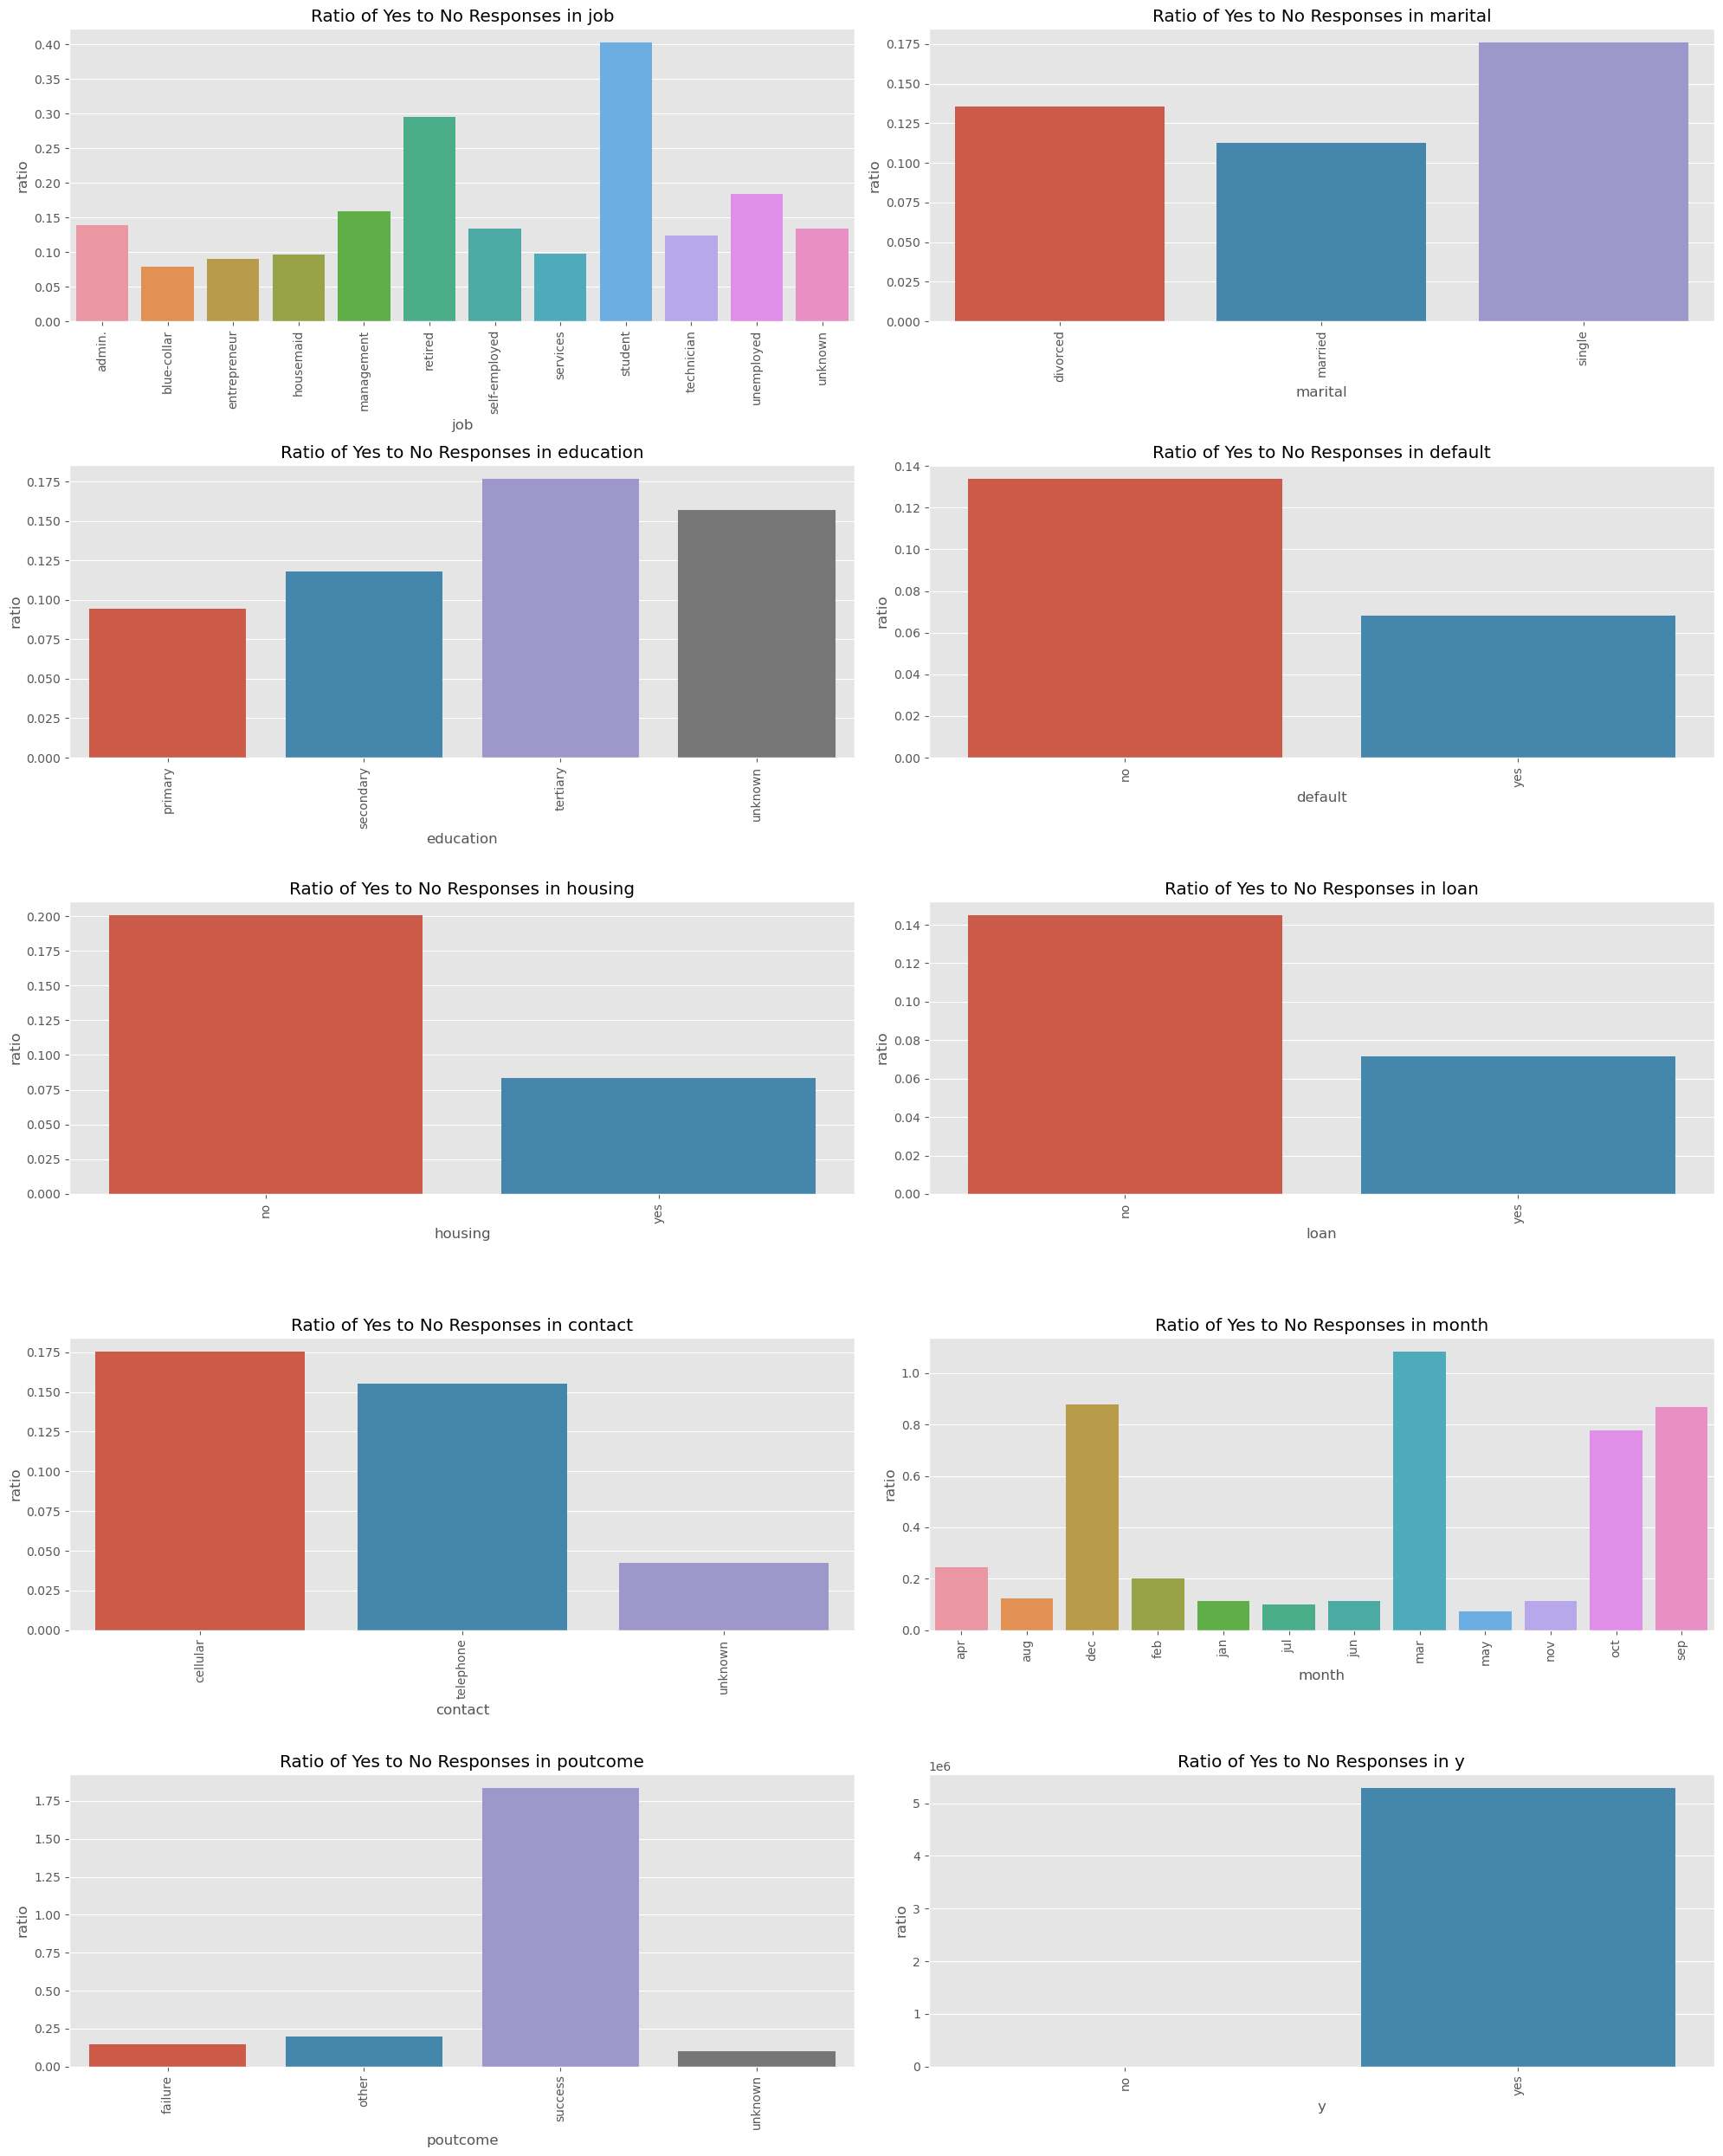

In [11]:
plt.style.use("ggplot")

# Create a subplot grid. Adjust the dimensions as needed based on the number of categorical variables
fig, axs = plt.subplots(len(cat_var) // 2 + len(cat_var) % 2, 2, figsize=(20, 5 * len(cat_var) // 2))
axs = axs.ravel()  # Flatten the array of axes for easier indexing

# Loop through the categorical variables and plot the ratio of 'yes' to 'no'
for i, column in enumerate(cat_var):
    # To avoid index errors when the number of categorical variables is odd
    if i >= len(axs):
        break

    # Calculate the ratio of 'yes' to 'no' for each category
    category_grouped = df.groupby([column, 'y']).size().unstack().fillna(0)
    category_grouped['ratio'] = category_grouped['yes'] / (category_grouped['no'] + 0.001)  # Avoid division by zero

    # Reset index to make 'column' a column in the DataFrame again, necessary for sns.barplot
    category_grouped.reset_index(inplace=True)

    # Plotting the ratio on the i-th subplot
    sns.barplot(x=column, y='ratio', data=category_grouped, ax=axs[i])
    axs[i].set_title(f'Ratio of Yes to No Responses in {column}')
    axs[i].tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for clarity

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Show the plot

OBSERVATIONS:

To achieve higher success rates, Prioritize customers who:
1. Are Students or Retired
2. Have a Tertiary Education over a Secondary over a Primary Education.
3. Are Divorced or Single
4. Do not have Housing loans
5. Do not have a loan of any kind

Prioritize Phone and Cell contact over other means of contact.
Prioritize contact in October, December, March, and September.
Ignore default status.

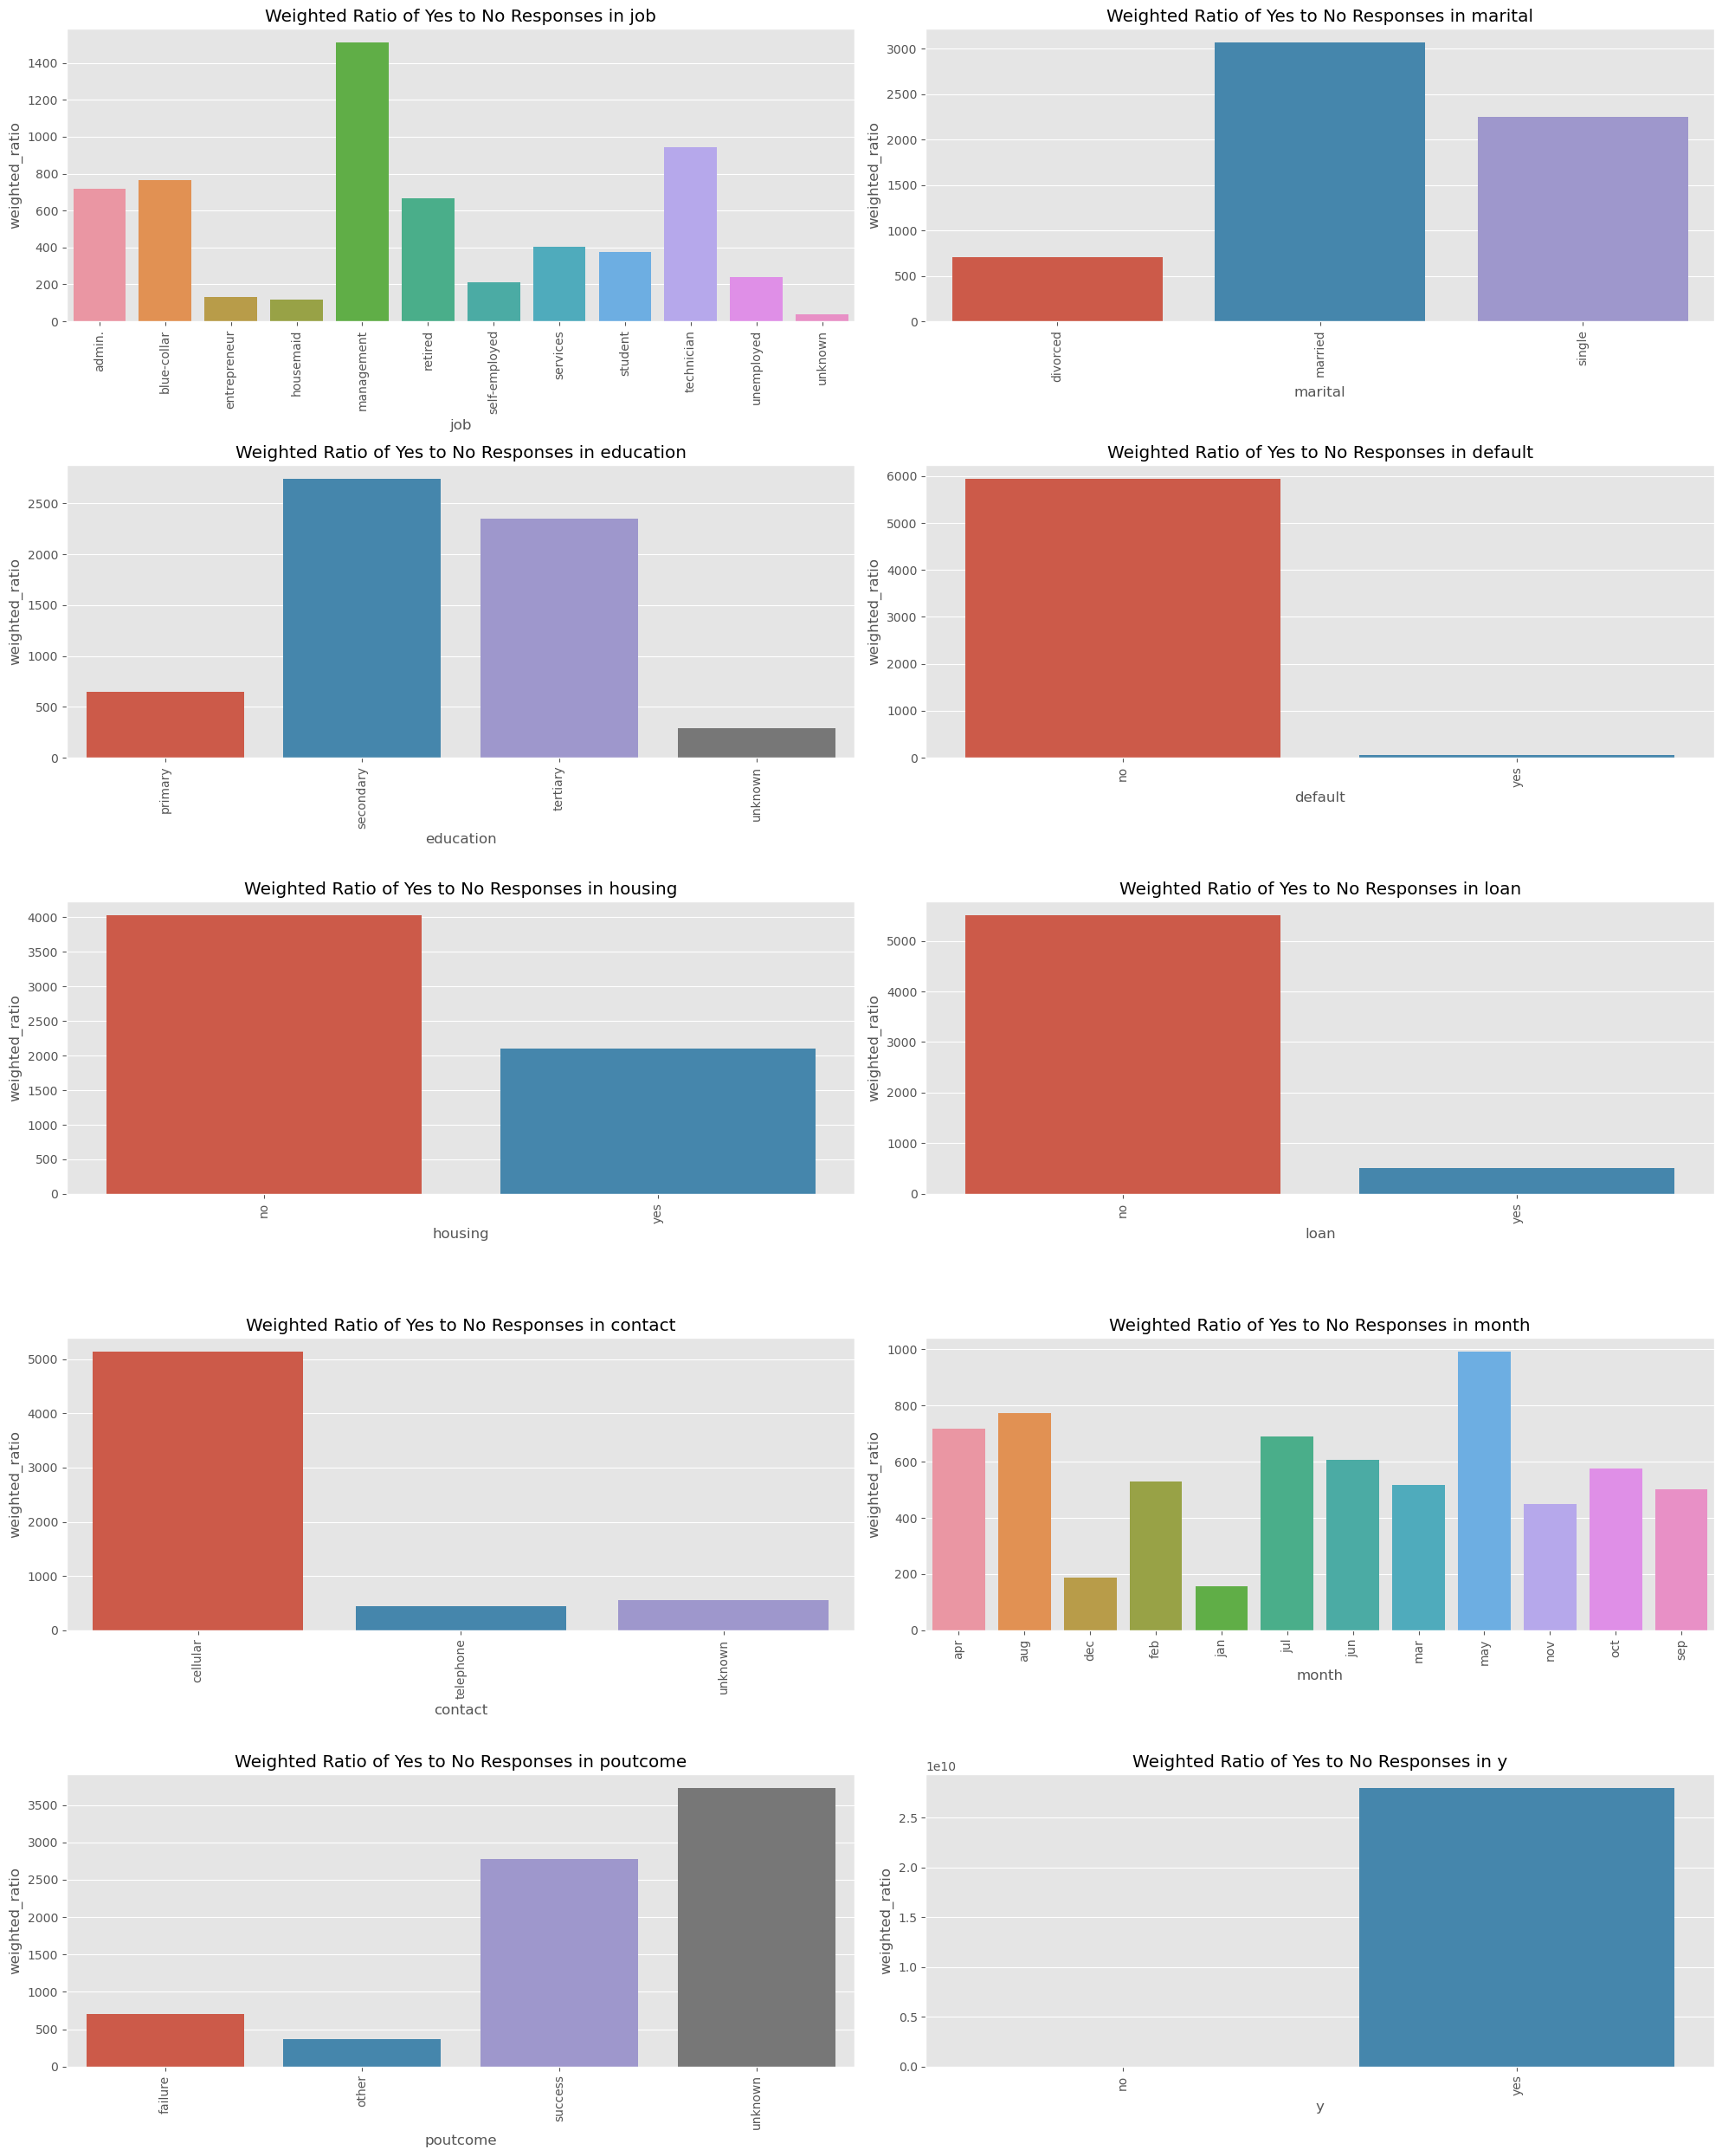

In [12]:
plt.style.use("ggplot")

fig, axs = plt.subplots(len(cat_var) // 2 + len(cat_var) % 2, 2, figsize=(20, 5 * len(cat_var) // 2))
axs = axs.ravel()  # Flatten the array of axes for easier indexing

# Loop through the categorical variables and plot the weighted ratio of target 'yes' to 'no'
for i, column in enumerate(cat_var):
    # To avoid index errors when the number of categorical variables is odd
    if i >= len(axs):
        break

    # Calculate the counts and ratio of 'yes' to 'no' for each category
    category_grouped = df.groupby([column, 'y']).size().unstack().fillna(0)
    category_grouped['weighted_ratio'] = (category_grouped['yes'] / (category_grouped['no'] + 0.001)) * (category_grouped['yes'] + category_grouped['no'])
    
    # Reset index to make 'column' a column in the DataFrame again, necessary for sns.barplot
    category_grouped.reset_index(inplace=True)

    # Plotting the weighted ratio on the i-th subplot
    sns.barplot(x=column, y='weighted_ratio', data=category_grouped, ax=axs[i])
    axs[i].set_title(f'Weighted Ratio of Yes to No Responses in {column}')
    axs[i].tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for clarity

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

OBSERVATIONS:

Recognize that the prioritized characteristics provided above represent a limited subset of possible yes's. Therefore, it is helpful to look at a
weighted ratio of positive outcomes to increase the shear volume of 'yes' responses with the target variable. Based on the weighted plots, additional
customer characteristics should be prioritized:

1. Prioritize 'Single' over 'Divorced' Individuals. Do not ignore 'Married' customers. Although the success rate is lower with married customers, 
there are as many gettable 'yes' responses for this category as the other two categories combined.
2. Prioritize customers who are managers, technicians, blue-collar workers, and admins. Although the success rate of these categories is lower than
retired and student customers, there are significantly more gettable 'yes' responses when the additional professions are included. Also, stay away
from customers who are unemployed, entrepreneurs, housemaids, and unknown professionals.

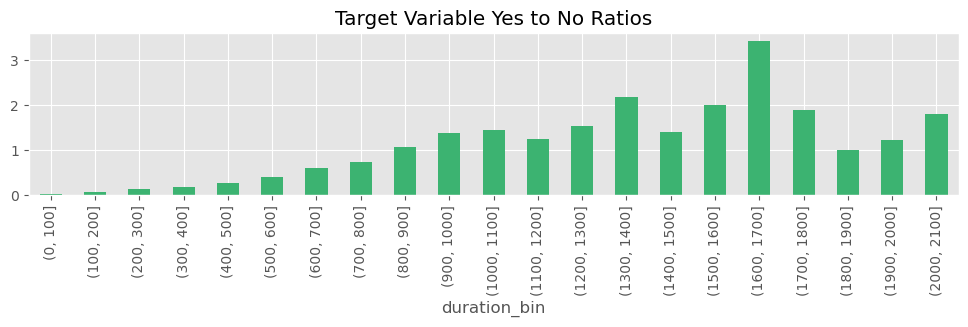

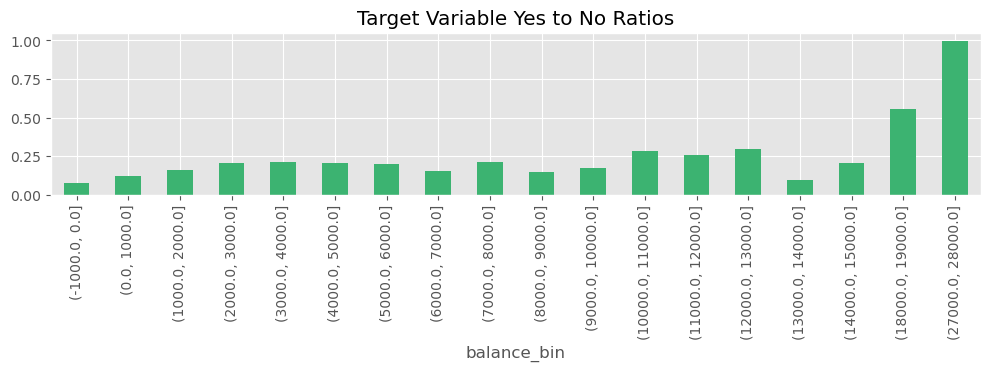

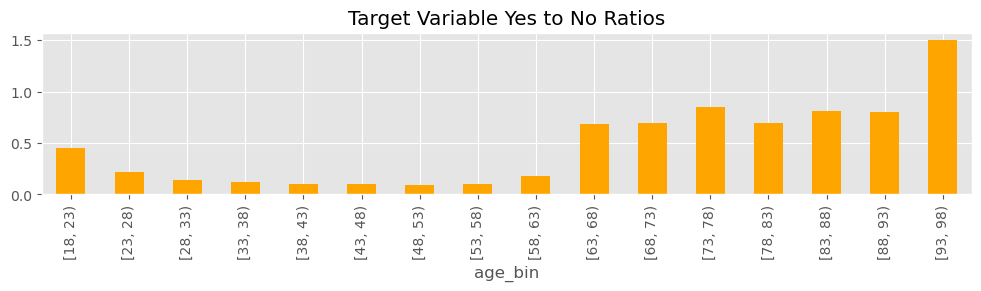

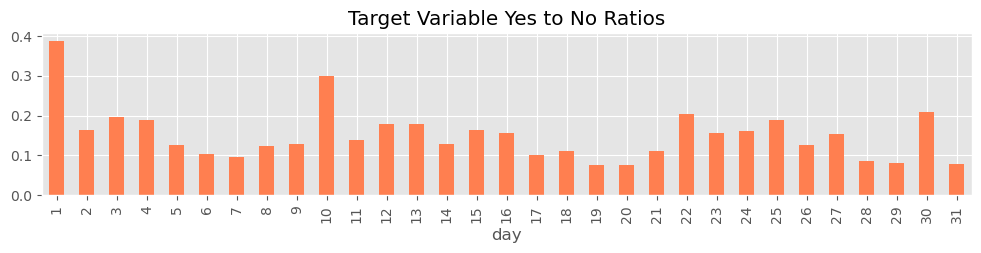

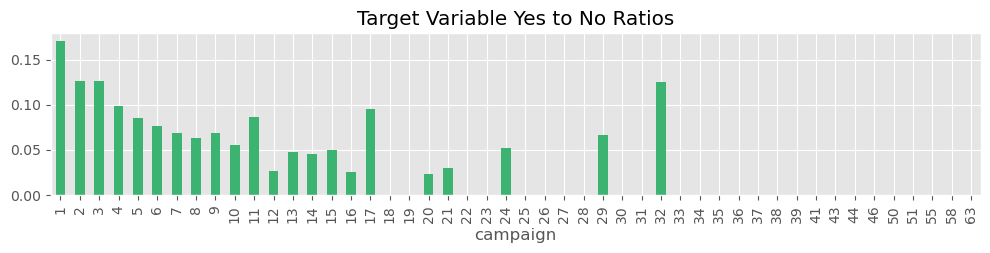

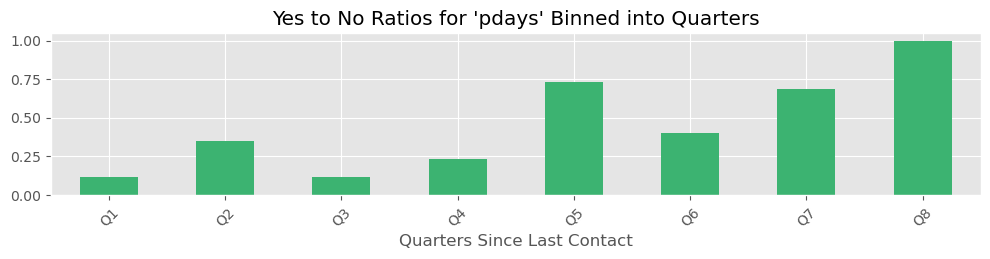

In [23]:
#################################################################################################################
# Ratio of target variable Yes's to No's for Binned Numeric Variables
#================================================================================================================
# Define bins every 100 units of duration
max_duration = df['duration'].max()
bins = np.arange(0, max_duration + 100, 100)  # Adjust the step to 100
df['duration_bin'] = pd.cut(df['duration'], bins)

# Calculate counts of 'yes' and 'no' responses for each bin
grouped = df.groupby('duration_bin')['y'].value_counts().unstack().fillna(0)

# Filter out bins with less than 5 'yes's and less than 5 'no's
filtered_grouped = grouped[(grouped['yes'] >= 5) & (grouped['no'] >= 5)]

# Compute the ratio of 'yes' to 'no' for the filtered bins
filtered_grouped['ratio'] = filtered_grouped['yes'] / (filtered_grouped['no'] + 0.001)

plt.figure(figsize=(12, 2.1))
filtered_grouped['ratio'].plot(kind='bar', color='mediumseagreen')
plt.title("Target Variable Yes to No Ratios")

#================================================================================================================
min_balance = np.floor(df['balance'].min() / 1000) * 1000
max_balance = np.ceil (df['balance'].max() / 1000) * 1000

bins = np.arange(min_balance, max_balance + 1000, 1000)  # Adjust the step to 5000

# Bin 'balance' data
df['balance_bin'] = pd.cut(df['balance'], bins)

# Calculate counts of 'yes' and 'no' responses for each bin
grouped = df.groupby('balance_bin')['y'].value_counts().unstack().fillna(0)

# Filter out bins with less than 5 'yes's and less than 5 'no's
filtered_grouped = grouped[(grouped['yes'] >= 5) & (grouped['no'] >= 5)]

# Compute the ratio of 'yes' to 'no' for the filtered bins
filtered_grouped['ratio'] = filtered_grouped['yes'] / (filtered_grouped['no'] + 0.001)

# Plot the ratios
plt.figure(figsize=(12, 2.1))
filtered_grouped['ratio'].plot(kind='bar', color='mediumseagreen')
plt.title("Target Variable Yes to No Ratios")

#================================================================================================================
# Bin ages by every 5 years
max_age = df['age'].max()
bins = np.arange(df['age'].min(), max_age + 5, 5)  # Creating bins from min age to max age, every 5 years
df['age_bin'] = pd.cut(df['age'], bins, right=False)

# Calculate counts of 'yes' and 'no' responses for each age bin
age_bin_grouped = df.groupby('age_bin')['y'].value_counts().unstack().fillna(0)

# Compute the ratio of 'yes' to 'no' for each age bin
age_bin_grouped['ratio'] = age_bin_grouped['yes'] / (age_bin_grouped['no'] + 0.001)

# Plot the ratios
plt.figure(figsize=(12, 2.1))
age_bin_grouped['ratio'].plot(kind='bar', color='orange')
plt.title("Target Variable Yes to No Ratios")

#================================================================================================================
# Calculate counts of 'yes' and 'no' responses for each day
day_grouped = df.groupby('day')['y'].value_counts().unstack().fillna(0)

# Compute the ratio of 'yes' to 'no' for each day
# Adding a small number (e.g., 0.001) to avoid division by zero
day_grouped['ratio'] = day_grouped['yes'] / (day_grouped['no'] + 0.001)

# Plot the ratios
plt.figure(figsize=(12, 2.1))
day_grouped['ratio'].plot(kind='bar', color='coral')
plt.title("Target Variable Yes to No Ratios")

#================================================================================================================
# Calculate counts of 'yes' and 'no' responses for each number of contacts (campaign)
campaign_grouped = df.groupby('campaign')['y'].value_counts().unstack().fillna(0)

# Compute the ratio of 'yes' to 'no' for each number of contacts
# Adding a small number (e.g., 0.001) to avoid division by zero
campaign_grouped['ratio'] = campaign_grouped['yes'] / (campaign_grouped['no'] + 0.001)

# Plot the ratios
plt.figure(figsize=(12, 2.1))
campaign_grouped['ratio'].plot(kind='bar', color='mediumseagreen')
plt.title("Target Variable Yes to No Ratios")
plt.show()

#================================================================================================================
max_pdays = df['pdays'].max()
bins = np.arange(-1, max_pdays + 120, 120)  # Start from -1 to include those never contacted and adjust for 120-day increments

# Bin 'pdays' data
df['pdays_bin'] = pd.cut(df['pdays'], bins=bins, right=False)

# Calculate counts of 'yes' and 'no' responses for each bin of 'pdays'
pdays_grouped = df.groupby('pdays_bin')['y'].value_counts().unstack().fillna(0)

# Compute the ratio of 'yes' to 'no' for each bin
pdays_grouped['ratio'] = pdays_grouped['yes'] / (pdays_grouped['no'] + 0.001)  # Add 0.001 to avoid division by zero

# Generate labels for the x-axis based on quarters instead of days
labels = [f"Q{i+1}" for i in range(len(pdays_grouped.index))]

# Plot the ratios with quarter labels
plt.figure(figsize=(12, 2.1))
pdays_grouped['ratio'].plot(kind='bar', color='mediumseagreen')
plt.title("Yes to No Ratios for 'pdays' Binned into Quarters")
plt.xlabel("Quarters Since Last Contact")
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)
plt.show()

OBSERVATIONS:

1. Keep customers on the line. Longer calls lead to 'yes' responses.
2. Prioritize customers with balances of $2,000 or more.
3. Contact customers on the first day of the month.
4. Focus on older customers at or beyond retirement age. The older, the better.
5. Engage customers through multiple campaigns but expect diminishing returns with each successive contact.

# 3. Data Preparation

In [14]:
warnings.filterwarnings('ignore')

# Create two separate dataframes to support two separate analyses. For the first, create models to predict the
# behavior of "Previously Contacted" customers. For the second, create models to predict the behavior of
# "Not Previously Contacted" customers. Prepare the datasets by replacing missing values and handling outliers
# based on a Quintile assessment. Also, handle independent variables with skewed normal distributions.

#################################################################################################################
# Define function for handling Outlier Vaslues in Numeric Columns Based on Quantile Analysis
#################################################################################################################

def handle_outliers(df, columns, f_handle):
    
    # Initialize lists to store the results
    lower_bounds = []
    upper_bounds = []
    outlier_cnts = []

    for i in columns:
        
        # Calculate IQR
        IQR = df[i].quantile(0.95) - df[i].quantile(0.05)
        lower_bound = np.round(df[i].quantile(0.05) - (1.5 * IQR),1)
        upper_bound = np.round(df[i].quantile(0.95) + (1.5 * IQR),1)
        
        # Calculate the number of outliers
        outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
        outlier_cnt = outliers.shape[0]
        
        # Print the bounds and the number of outliers
        print(f"{i:15}: LBound = {lower_bound:8}, UBound = {upper_bound:8}, Outliers = {outlier_cnt:8}")
        
        # Append the results to their respective lists
        lower_bounds.append(lower_bound)
        upper_bounds.append(upper_bound)
        outlier_cnts.append(outlier_cnt)

    print()
    if f_handle == True:
        j = 0
        for i in columns:
            df1.loc[df1[i] > upper_bounds[j], i] = int(upper_bounds[j])
            j = j + 1  

    # Optionally, return the lists of boundaries and counts
    return lower_bounds, upper_bounds, outlier_cnts

#################################################################################################################
# Implement Separate Modeling and Feature Importance Analyses for 1) Previous Contacted and 2) NOT Previously
# Contacted Customers
#################################################################################################################

#================================================================================================================
# ANALYSIS 1: Prepare Dataframe for Previously Contacted Customers
#================================================================================================================

df1 = df
df1 = df1[df1['pdays'   ] != -1]
df1 = df1[df1['previous'] !=  0]
print(df1.shape)
print(df1['y'].value_counts())

#----------------------------------------------------------------------------------------------------------------
#'Unknown' represents missing data. Replacing them with the modecat_var1
#----------------------------------------------------------------------------------------------------------------

cat_var1 = df1.select_dtypes(include=["object"]).columns
for column in cat_var1:
    mode= df1[column].mode()[0]
    df1[column]= df1[column].replace("unknown", mode)

#----------------------------------------------------------------------------------------------------------------
#'age', 'duration' and 'campaign' are skewed. Compute the IQR and replace the outliers with the lower and upper bounds
#----------------------------------------------------------------------------------------------------------------

columns =  ["age", "balance", "duration", "campaign", 'pdays', 'previous']
print()
print("==========================================================================")
print("ANALYSIS 1: PREVIOUSLY CONTACTED")
print("==========================================================================")
print("Before Quintile Processing...")
lower_boundries, upper_boundries, outlier_counts = handle_outliers(df1, columns, True )
print("After Quintile Processing...")
lower_boundries, upper_boundries, outlier_counts = handle_outliers(df1, columns, False)

#----------------------------------------------------------------------------------------------------------------
#Results are better without implementing log of numeric variables
#----------------------------------------------------------------------------------------------------------------

#df1['balance'     ] = df1['balance' ] - df1['balance' ].min() + 1
#df1['duration'    ] = df1['duration'] - df1['duration'].min() + 1
#df1['pdays'       ] = df1['pdays'   ] - df1['pdays'   ].min() + 1

#df1['log-age'     ] = np.log(df1['age'     ])
#df1['log-balance' ] = np.log(df1['balance' ])
#df1['log-duration'] = np.log(df1['duration'])
#df1['log-pdays'   ] = np.log(df1['pdays'   ])

#df1 = df1.drop(['age', 'balance', 'duration', 'pdays'], axis=1)

#================================================================================================================
# ANALYSIS 2: Prepare Dataframe for NOT Previously Contacted Customers
#================================================================================================================

df2 = df
df2 = df2[df2['pdays'   ] == -1]
df2 = df2[df2['previous'] ==  0]
df2 = df2.drop(columns=["pdays", "previous", "campaign", "duration"], axis=1)

#----------------------------------------------------------------------------------------------------------------
#'Unknown' represents missing data. Replacing them with the modecat_var1
#----------------------------------------------------------------------------------------------------------------

cat_var2 = df2.select_dtypes(include=["object"]).columns
for column in cat_var2:
    mode= df2[column].mode()[0]
    df2[column]= df2[column].replace("unknown", mode)

#----------------------------------------------------------------------------------------------------------------
#'age', 'duration' and 'campaign' are skewed. Compute the IQR and replace the outliers with the lower and upper bounds
#----------------------------------------------------------------------------------------------------------------

columns =  ["age", "balance"]
print("==========================================================================")
print("ANALYSIS 2: NOT PREVIOUSLY CONTACTED")
print("==========================================================================")
print("Before Quintile Processing...")
lower_boundries, upper_boundries, outlier_counts = handle_outliers(df2, columns, True )
print("After Quintile Processing...")
lower_boundries, upper_boundries, outlier_counts = handle_outliers(df2, columns, False)

#----------------------------------------------------------------------------------------------------------------
#df2 is quite large, so we're going to downsample it for this analysis and balance out the dataset in the process.
#----------------------------------------------------------------------------------------------------------------

class_counts   = df2['y'].value_counts()  # Identify the counts of each class
min_count      = class_counts.min()       # Find the count of the least represented class
downsampled_df = pd.DataFrame()           # Initialize an empty DataFrame for the downsampled data

# For each unique class in the target variable
for class_name in class_counts.index:
    class_df_sample = df2[df2['y'] == class_name].sample(n=min_count, random_state=42)   # Randomly sample from the DataFrame where the target equals class_name
    downsampled_df = pd.concat([downsampled_df, class_df_sample], axis=0)                # Append the sampled DataFrame to the downsampled DataFrame

df2 = downsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)              # Shuffle the downsampled DataFrame to mix the classes
print(df2.shape)
df2['y'].value_counts()

#----------------------------------------------------------------------------------------------------------------
#Results are better without implementing log of numeric variables
#----------------------------------------------------------------------------------------------------------------

#df2['balance'     ] = df2['balance' ] - df2['balance' ].min() + 1

#df2['log-age'     ] = np.log(df2['age'     ])
#df2['log-balance' ] = np.log(df2['balance' ])

#df1 = df2.drop(['age', 'balance', 'duration', 'pdays'], axis=1)

(8257, 21)
y
no     6352
yes    1905
Name: count, dtype: int64

ANALYSIS 1: PREVIOUSLY CONTACTED
Before Quintile Processing...
age            : LBound =    -24.0, UBound =    112.0, Outliers =        0
balance        : LBound =  -9512.9, UBound =  15705.5, Outliers =       54
duration       : LBound =   -963.0, UBound =   1709.0, Outliers =       15
campaign       : LBound =     -5.0, UBound =     11.0, Outliers =       12
pdays          : LBound =   -357.5, UBound =    806.5, Outliers =        9
previous       : LBound =    -11.0, UBound =     21.0, Outliers =       51

After Quintile Processing...
age            : LBound =    -24.0, UBound =    112.0, Outliers =        0
balance        : LBound =  -9512.9, UBound =  15705.5, Outliers =        0
duration       : LBound =   -963.0, UBound =   1709.0, Outliers =        0
campaign       : LBound =     -5.0, UBound =     11.0, Outliers =        0
pdays          : LBound =   -357.5, UBound =    806.5, Outliers =        0
previous       : L

y
no     3384
yes    3384
Name: count, dtype: int64

# 4. Predictive Modeling / 5. Feature Importance

In [24]:
#Implement predictive modeling and feature importance analysis. This routine scales numeric columns and 
#encodes categorical columns via a piepline. The dataset is then split into training and test sets. Oversampling
#is then applied to balance out the classes in the target variable, if desired (only when f_resample = True)
#is set in the run_models function. Finally, the code implements five different classifiers using GridSearchCV
#to determine the best Hyper-Parameters for each and reports the Feature Importances for each classifier
#based on the best parameters found for that classifier.

##############################################################################################################
#Function to Retain Feature Names with OneHotEncoding
##############################################################################################################

def get_feature_names(column_transformer):
    
    output_features = []

    for transformer_info in column_transformer.transformers_:
        name, transformer, original_feature_names = transformer_info
        if name == 'remainder':
            if column_transformer.remainder == 'passthrough':
                remainder_cols = column_transformer.feature_names_in_  # If remainder='passthrough', include original column names
                output_features.extend([remainder_cols[i] for i in range(len(remainder_cols)) if i not in column_transformer._transformer_to_input_indices(name)])
            continue
        if hasattr(transformer, 'steps'):
            last_step = transformer.steps[-1][1]
        else:
            last_step = transformer
        if hasattr(last_step, 'get_feature_names_out'):
            feature_names = last_step.get_feature_names_out(original_feature_names)  # Use the transformer's 'get_feature_names_out' method if available
        else:
            feature_names = original_feature_names                                   # Otherwise, use the original feature names directly
        output_features.extend(feature_names)
    
    return output_features

##############################################################################################################
#Function to Aggregate Feature Importances
##############################################################################################################

def aggregate_feature_importances(importances, feature_names, s):
    # Aggregate importances for original features
    aggregated_importances = {}
    for importance, feature_name in zip(importances, feature_names):
        original_feature = feature_name.split(s)[0]  # Splitting based on your OneHotEncoding naming convention
        if original_feature in aggregated_importances:
            aggregated_importances[original_feature] += np.abs(importance)  # Summing absolute importance for aggregated features
        else:
            aggregated_importances[original_feature] = np.abs(importance)
    return aggregated_importances

##############################################################################################################
#Function to Implement Encoding, Model Fit, and Provide Feature Importances
##############################################################################################################

def run_models(df_in, f_resample):

#   Provide the dataframe to be used for the analysis and set f_resample to True if oversampling is desired to
#   balance out the classes in the target variable. IMPORTANT: Oversampling is applied only to training data-
#   sets, NEVER to test data sets!
    
    #=========================================================================================================
    # Split Target Variable from Independent Variables
    #=========================================================================================================
    
    X = df_in.drop('y', axis=1)
    y = df_in['y'].apply(lambda x: 1 if x == 'yes' else 0)

    #=========================================================================================================
    # Preprocessing pipelines for both numeric and categorical data
    #=========================================================================================================
    
    num_trnsfrm = Pipeline([
        ('imputer', SimpleImputer(strategy='mean'         )),
        ('scaler' , StandardScaler(                       ))])
    cat_trnsfrm = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot' , OneHotEncoder(handle_unknown='ignore' ))])
    preprocessor = ColumnTransformer([
        ('num'    , num_trnsfrm, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat'    , cat_trnsfrm, X.select_dtypes(include=['object']).columns)])
    
    X_encoded = preprocessor.fit_transform(X)
    feature_names = get_feature_names(preprocessor)
    X_encoded_df = pd.DataFrame(X_encoded.toarray() if hasattr(X_encoded, 'toarray') else X_encoded, columns=feature_names)

    #=========================================================================================================
    # Dataset Splitting
    #=========================================================================================================
    
    X_train, X_test, y_train, y_test= train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    #=========================================================================================================
    # Oversampling to Balance out the target variable
    #=========================================================================================================
    
    if f_resample == True:
        smote= SMOTETomek(sampling_strategy=0.75)
        X_train_smp, y_train_smp = smote.fit_resample(X_train, y_train)
    else:
        X_train_smp = X_train
        y_train_smp = y_train
    print("Before resampling:\n", y_train.value_counts()    )
    print("After resampling :\n", y_train_smp.value_counts())

    #=========================================================================================================
    # Hyper-Parameters for GridSearch
    #=========================================================================================================
    
    classifiers = {'LogisticRegression'    : { 'model' : LogisticRegression(solver='liblinear'),
                                               'params': {'C'                 : 10.0 ** np.arange(-2, 3)  ,
                                                          'penalty'           : ['l1', 'l2'              ]}},
                   'KNeighborsClassifier'  : { 'model' : KNeighborsClassifier(),
                                               'params': {'n_neighbors'       : [3, 5, 7, 10             ],
                                                          'metric'            : ['euclidean', 'manhattan'],
                                                          'weights'           : ['uniform'  , 'distance' ]}},
                   'DecisionTreeClassifier': { 'model' : DecisionTreeClassifier(),
                                               'params': {'max_depth'         : [None, 5, 10, 15, 20, 30 ],
                                                          'min_samples_leaf'  : [1, 2, 4                 ],
                                                          'min_samples_split' : [2, 5, 10                ]}},
                   'RandomForestClassifier': { 'model' : RandomForestClassifier(),
                                               'params': {'n_estimators'      : [10, 50, 100, 200        ],
                                                          'max_depth'         : [None, 5, 10, 15, 20     ],
                                                          'min_samples_leaf'  : [1, 2, 4                 ],
                                                          'min_samples_split' : [2, 5, 10                ]}},
                   'SupportVectorMachine'  : { 'model' : SVC(),
                                               'params': {'C'                 : [0.1, 1, 10, 100         ],
                                                          'kernel'            : ['linear', 'rbf'         ],
                                                          'gamma'             : ['scale', 'auto'         ]}}}

    #=========================================================================================================
    # Loop through classifiers to Implement Gridsearch and Feature Importance ANalysis for Each
    #=========================================================================================================
    
    for classifier_name, classifier_info in classifiers.items():
        
        #-----------------------------------------------------------------------------------------------------
        # Identify the Classifier
        #-----------------------------------------------------------------------------------------------------

        print("#" * 135)
        print(f"Training {classifier_name}")
        print("#" * 135)

        #-----------------------------------------------------------------------------------------------------
        # Implement GridSearchCV
        #-----------------------------------------------------------------------------------------------------

        start_time = time.time()  # Start timing
        gridsearch = GridSearchCV(classifier_info['model'], classifier_info['params'], cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
        gridsearch.fit(X_train_smp, y_train_smp)  # Fitting the model on resampled data
        duration = time.time() - start_time
    
        #-----------------------------------------------------------------------------------------------------
        # Provide Evaluation of Performance for Best Model
        #-----------------------------------------------------------------------------------------------------

        y_pred = gridsearch.predict(X_test)       # Make predictions on the test set

        print(f'Classification Report for {classifier_name} using best parameters::\n{classification_report(y_test, y_pred)}')
        print("-" * 135)
        # Display the best parameters and score for each classifier
        print(f"Best parameters for {classifier_name}: {gridsearch.best_params_}")
        print(f"Best Training Score for {classifier_name}: {gridsearch.best_score_}")
        print(f"Training duration: {duration:.2f} seconds")
        print()
    
        #-----------------------------------------------------------------------------------------------------
        # Plot Feature Importances if Applicable
        #-----------------------------------------------------------------------------------------------------

        best_model = gridsearch.best_estimator_
        feature_names = get_feature_names(preprocessor)  # Extract feature names
    
        if hasattr(best_model, 'feature_importances_') or hasattr(best_model, 'coef_'):
            importances = best_model.feature_importances_ if hasattr(best_model, 'feature_importances_') else best_model.coef_[0]
            aggregated_importances = aggregate_feature_importances(importances, feature_names,'_')
        
            # Sorting features by importance
            sorted_features = sorted(aggregated_importances.items(), key=lambda item: item[1], reverse=True)
            sorted_feature_names, sorted_importances = zip(*sorted_features)
        
            # Plotting
            plt.figure(figsize=(10, 3))
            plt.title(f'Aggregated Feature Importances for {classifier_name}')
            plt.bar(range(len(sorted_feature_names)), sorted_importances, align='center')
            plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

Before resampling:
 y
0    5073
1    1532
Name: count, dtype: int64
After resampling :
 y
0    5035
1    3766
Name: count, dtype: int64
#######################################################################################################################################
Training LogisticRegression
#######################################################################################################################################
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Classification Report for LogisticRegression using best parameters::
              precision    recall  f1-score   support

           0       0.93      0.87      0.89      1279
           1       0.62      0.76      0.69       373

    accuracy                           0.84      1652
   macro avg       0.77      0.81      0.79      1652
weighted avg       0.86      0.84      0.85      1652

-----------------------------------------------------------------------------------------------------------

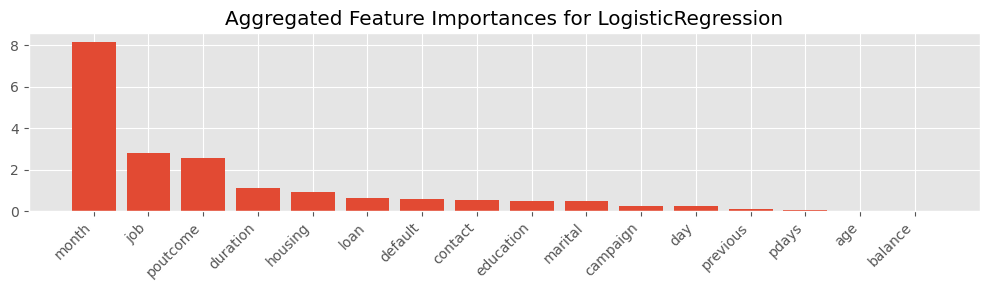

#######################################################################################################################################
Training KNeighborsClassifier
#######################################################################################################################################
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Classification Report for KNeighborsClassifier using best parameters::
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1279
           1       0.57      0.64      0.60       373

    accuracy                           0.81      1652
   macro avg       0.73      0.75      0.74      1652
weighted avg       0.82      0.81      0.81      1652

---------------------------------------------------------------------------------------------------------------------------------------
Best parameters for KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distanc

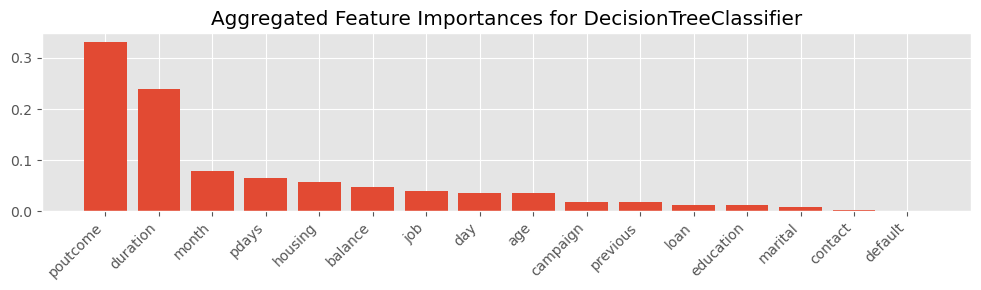

#######################################################################################################################################
Training RandomForestClassifier
#######################################################################################################################################
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Classification Report for RandomForestClassifier using best parameters::
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1279
           1       0.68      0.64      0.66       373

    accuracy                           0.85      1652
   macro avg       0.79      0.78      0.78      1652
weighted avg       0.85      0.85      0.85      1652

---------------------------------------------------------------------------------------------------------------------------------------
Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_sampl

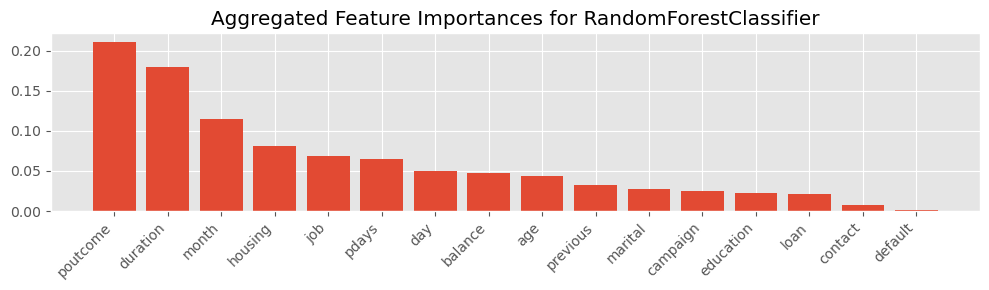

#######################################################################################################################################
Training SupportVectorMachine
#######################################################################################################################################
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Classification Report for SupportVectorMachine using best parameters::
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1279
           1       0.61      0.66      0.63       373

    accuracy                           0.83      1652
   macro avg       0.75      0.77      0.76      1652
weighted avg       0.83      0.83      0.83      1652

---------------------------------------------------------------------------------------------------------------------------------------
Best parameters for SupportVectorMachine: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Training Sc

In [19]:
#RUN ANALSYSIS 1: PREVIOUSLY CONTACTED CUSTOMERS
run_models(df1, True)

OBSERVATIONS (For Previously Contacted Customers):

All the models perform reasonably well within a range of 5% points of accuracy.
The RandomForest Model provides the best test set accuracy = 85%. The Logistic Regression and Decision Tree Classifier Models have 10% less training accuracy than the other models, which performed uniformly well in this regard. 
Prediction of 'No' responses is much more accurate than the prediction of 'Yes' responses. 
LogisticRegression provides the highest accuracy for predicting 'Yes' responses.

Before resampling:
 y
0    2709
1    2705
Name: count, dtype: int64
After resampling :
 y
0    2709
1    2705
Name: count, dtype: int64
#######################################################################################################################################
Training LogisticRegression
#######################################################################################################################################
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Classification Report for LogisticRegression using best parameters::
              precision    recall  f1-score   support

           0       0.63      0.73      0.68       675
           1       0.68      0.57      0.62       679

    accuracy                           0.65      1354
   macro avg       0.65      0.65      0.65      1354
weighted avg       0.65      0.65      0.65      1354

-----------------------------------------------------------------------------------------------------------

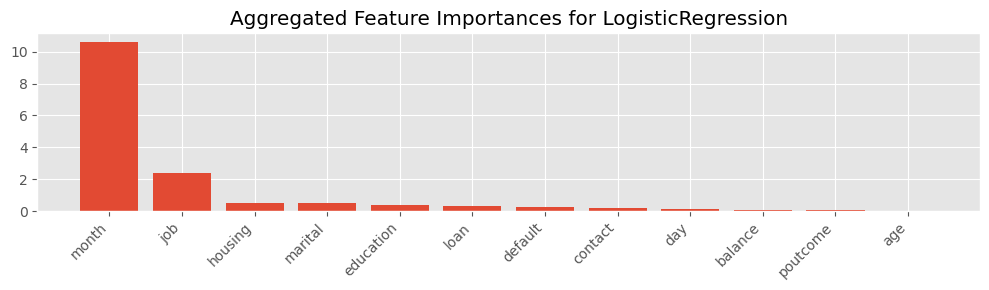

#######################################################################################################################################
Training KNeighborsClassifier
#######################################################################################################################################
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Classification Report for KNeighborsClassifier using best parameters::
              precision    recall  f1-score   support

           0       0.61      0.78      0.69       675
           1       0.70      0.51      0.59       679

    accuracy                           0.64      1354
   macro avg       0.66      0.65      0.64      1354
weighted avg       0.66      0.64      0.64      1354

---------------------------------------------------------------------------------------------------------------------------------------
Best parameters for KNeighborsClassifier: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'unifor

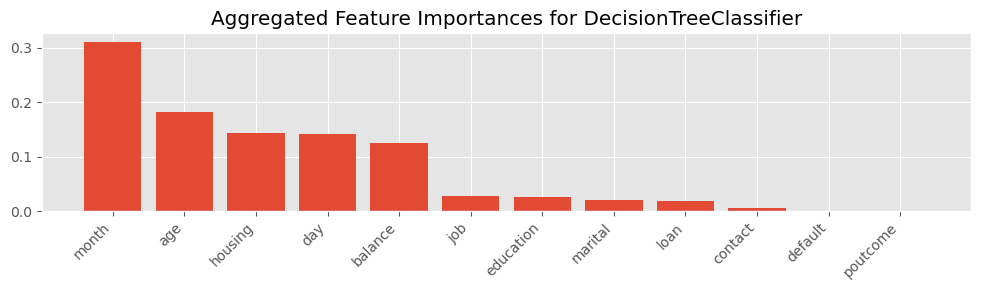

#######################################################################################################################################
Training RandomForestClassifier
#######################################################################################################################################
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Classification Report for RandomForestClassifier using best parameters::
              precision    recall  f1-score   support

           0       0.64      0.76      0.69       675
           1       0.70      0.58      0.64       679

    accuracy                           0.67      1354
   macro avg       0.67      0.67      0.67      1354
weighted avg       0.67      0.67      0.67      1354

---------------------------------------------------------------------------------------------------------------------------------------
Best parameters for RandomForestClassifier: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples

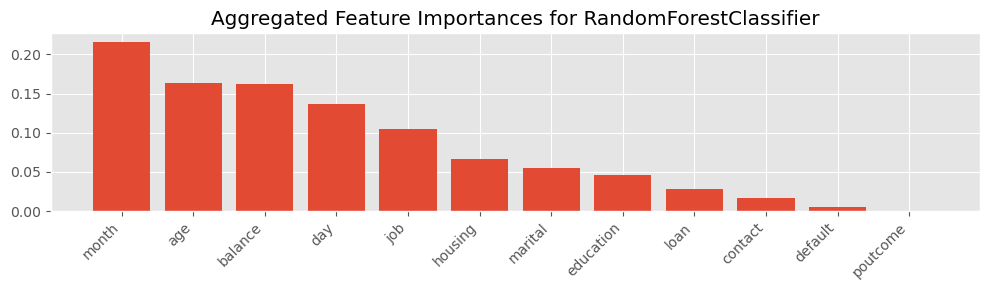

#######################################################################################################################################
Training SupportVectorMachine
#######################################################################################################################################
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Classification Report for SupportVectorMachine using best parameters::
              precision    recall  f1-score   support

           0       0.62      0.79      0.70       675
           1       0.71      0.53      0.61       679

    accuracy                           0.66      1354
   macro avg       0.67      0.66      0.65      1354
weighted avg       0.67      0.66      0.65      1354

---------------------------------------------------------------------------------------------------------------------------------------
Best parameters for SupportVectorMachine: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Training Sco

In [25]:
#RUN ANALSYSIS 1: NOT PREVIOUSLY CONTACTED CUSTOMERS
run_models(df2, False)

OBSERVATIONS (For NOT Previously Contacted Customers):

The outcomes for NOT Previously Contacted Customers are less predictable.
The NOT_Previously_Contacted models on average are 20% less predictive than the Previously_Contacted models.
The RandomForest Model provides the best test set accuracy = 67% and the highest training set accuracy = 67%.
Prediction of 'No' responses is much more accurate than the prediction of 'Yes' responses in all models. 
RandomForest provides the highest accuracy for predicting 'Yes' responses.

# 6. Deployment

Incorporating the detailed observations about customer characteristics that correlate with higher success rates (Yes's to term deposit offers), here's a refined set of recommendations for optimizing a bank's customer engagement and marketing strategies:

## Recommendations for Customer Engagement
### Overall
The most important factors leading to successful outcomes of marketing outreach include (in order of importance): Duration of Contact Calls (lobger is better), Month of Contact, Lack of an Existing Housing Loan, Job Type (see demographics below), and Number of Days since last Contact. Prioritize the marketing campaigns to address these 
### Demographic and Professional Prioritization
1. Target Specific Demographics: Focus on students and retired individuals, as these groups have shown a higher likelihood of responding positively. Tailor marketing messages to resonate with the lifestyle and financial needs of these demographics.
2. Education Level Matters: Give priority to customers with tertiary education, followed by those with secondary and then primary education. This suggests tailoring communication and offers that resonate with the educational backgrounds of the target audience.
3. Marital Status as a Criterion: Specifically target divorced or single individuals for campaigns, as they are more likely to respond positively. However, do not exclude married customers. Despite a lower success rate, the sheer volume of the married demographic means there are still significant opportunities within this group.
### Financial Products and Services
1. Focus on Customers Without Loans: Prioritize customers who do not have housing loans or any loans. Products and campaigns should emphasize financial freedom and security, appealing to those without existing financial burdens.
2. Focus on customers with balances greater than $2,000.
### Communication Strategies
1. Optimize Communication Channels: Favor phone and cell contact as the primary means of reaching out to customers. These direct communication methods have proven more effective and should be used to engage customers personally.
2. Seasonal Timing for Contact: Align marketing campaigns with specific months — October, December, March, and September — when customers are much more receptive to engagement.
3. Monthly Timing: Align outreach to occur on the first day and avoid the last day of each month when outreach is implemented.
4. Focus on contacting new customers instead of recycling through previously contacted customers. Prioritize contact with customers who have had the longest time since previous contact.
### Professional Categories and Default Status
1. Broaden the Professional Focus: While retirees and students are prime targets, also include managers, technicians, blue-collar workers, and administrative staff in the outreach. These professions represent a significant portion of the customer base with potential for positive responses. Conversely, exercise caution with unemployed individuals, entrepreneurs, housemaids, and those in unknown professions, as these groups have shown lower acceptance rates.
2. Overlook Default Status: The default status of customers should not be a primary criterion for exclusion in marketing strategies, suggesting that a customer's past financial missteps do not significantly impact their current engagement potential.